# Pre-Lab

In [173]:
import pandas as pd
import numpy as np
import random

## Load data

In [174]:
header_list = ["X1", "X2", "Y"]
df = pd.read_csv("../data_ffnn_3classes.txt",names=header_list,sep =" ")
df.head()

,X1,X2,Y
0,1.9643,4.5957,1.0
1,2.2753,3.8589,1.0
2,2.9781,4.5651,1.0
3,2.9320,3.5519,1.0
4,3.5772,2.8560,1.0


## Define X, X_, V , X__ , F , F_ , W , F__ , G, and E

### ${X}$ :

In [175]:
X = np.array( df[['X1','X2']])
#X

### $\bar{X}$ :

In [176]:
n = X.shape[1]
i = X.shape[0]

x0 = np.array( [ 1 for i in range(i)])
X_ =  np.insert(X,0,x0,axis=1)
#X_

### V :

In [177]:
k=5
V = np.random.rand(n+1,k)
#V

### $\bar{\bar{X}}$ :

In [178]:
X__ = np.dot(X_,V)
#X__

### ${F}$ :

In [179]:
F = 1/(1 + np.exp(-X__))
#F

### $\bar{F}$ :

In [180]:
f0 = np.array([ 1 for i in range(F.shape[0])])
F_ =  np.insert(F,0,f0,axis=1)

### ${W}$ :

In [181]:
j = pd.get_dummies(df['Y']).shape[1]
W = np.random.rand(k+1,j)
#W

### $\bar{\bar{F}}$ :

In [182]:
F__ = np.dot(F_,W)
#F__

### ${G}$ :

In [183]:
G = 1/(1 + np.exp(-F__))
#G

### ${E}$ :

In [184]:
y= np.array( pd.get_dummies(df['Y']) )

In [185]:
def sse(G,y):
    E=0
    for a in range(i):
        for b in range(j):
            E = E + 0.5 * (( G[a][b] - y[a][b] ) ** 2 )
    return E

In [186]:
sse(G,y)

59.076858942888734

# Lab

## Show Graphically the training data

In [187]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

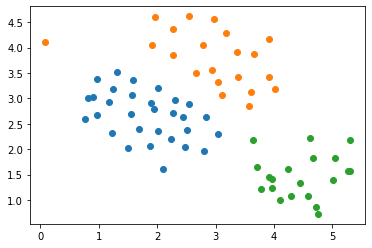

In [188]:
groups = df.groupby('Y')
for name, group in groups:
    plt.plot(group.X1,group.X2, marker ='.',linestyle='',markersize=12,label=name)
plt.show

## Function forward propagation

In [189]:
def forwardPropagation(df,V,W):
    X = np.array( df[['X1','X2']])
    n = X.shape[1]
    i = X.shape[0]
    x0 = np.array( [ 1 for i in range(i)])
    X_ =  np.insert(X,0,x0,axis=1)
    k=5
    X__ = np.dot(X_,V)
    F = 1/(1 + np.exp(-X__))
    f0 = np.array([ 1 for i in range(F.shape[0])])
    F_ =  np.insert(F,0,f0,axis=1)
    j = pd.get_dummies(df['Y']).shape[1]
    F__ = np.dot(F_,W)
    G = 1/(1 + np.exp(-F__))
    return G, F_ , F , X_

In [190]:
V = np.random.rand(n+1,k) 
W = np.random.rand(k+1,j)

y= np.array( pd.get_dummies(df['Y']) )
k=5
n = X.shape[1]
j = pd.get_dummies(df['Y']).shape[1]
i = X.shape[0]
learningRate=0.02

G, F_ , F , X_ = forwardPropagation(df,V,W)
sse(G,y)


56.82251292565805

## Backward propagation

In [191]:
def gradientW(K,i,j,G,y,F_,Wold,learningRate):
    Wnew=Wold
    for k in range(K+1):
        for j in range(j):
            for i in range(i):
                Wnew[k][j] = Wold[k][j] - learningRate * ( (G[i][j] - y[i][j]) * G[i][j] * (1 - G[i][j]) * F_[i][k] )
                
    return Wnew
            

In [192]:
def gradientV(K,i,j,G,y,F,W,Vold,X_,n,learningRate):
    Vnew=Vold
    for k in range(K):
        for n in range (n+1):
            for j in range(j):
                for i in range(i):
                    Vnew[n][k] = Vold[n][k] - learningRate * ( (G[i][j] - y[i][j]) * G[i][j] 
                                                     * (1 - G[i][j]) * W[k+1][j] * F[i][k] * (1 - F[i][k]) * X_[i][n])              
    return Vnew
            

In [193]:
W = gradientW(k,i,j,G,y,F_,W,learningRate)

In [194]:
V = gradientV(k,i,j,G,y,F,W,V,X_,n,learningRate)

In [195]:
G, F_ , F , X_ = forwardPropagation(df,V,W)
W = gradientW(k,i,j,G,y,F_,W,learningRate) 
V = gradientV(k,i,j,G,y,F,W,V,X_,n,learningRate)
sse(G,y)

55.67335925085682

## Looping

In [198]:
def loopFFNN(df):
    errors = []
    errorsI = []
    y= np.array( pd.get_dummies(df['Y']) ) 
    n = X.shape[1]
    j = pd.get_dummies(df['Y']).shape[1]
    i = X.shape[0]
    k=15
    V = np.random.rand(n+1,k) 
    W = np.random.rand(k+1,j)
    learningRate=0.02
    ITERATION = 5000
   
    
    for a in range(ITERATION):
        G, F_ , F , X_ = forwardPropagation(df,V,W)
        W = gradientW(k,i,j,G,y,F_,W,learningRate) 
        V = gradientV(k,i,j,G,y,F,W,V,X_,n,learningRate)
        errors.append(sse(G,y))
        errorsI.append(a)
    plt.plot(errorsI, errors, linewidth=2.0)
    return sse(G,y)


16.55182922670356

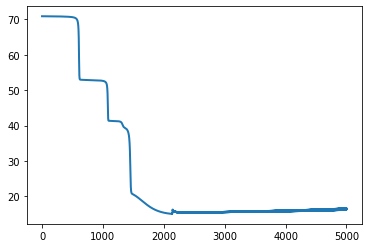

In [199]:
loopFFNN(df)